In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
import os

class ExtractData():
    def __int__(self, path_to_numpys='Montesinos/'):
        pass
    def convert(self, filelist):
        self.col_names=['datetime', 'periodo', ' None1', 'None2', 'infractions','noice']
        data = np.load(self.path+filelist)
        dataframe = pd.DataFrame(data, columns=self.col_names)
        return dataframe
    
    def run(self):
        self.path = 'Montesinos/'
        self.files = os.listdir(self.path)
        data = []

        for file in self.files:
            dataframe = self.convert(file)
            data.append(dataframe)
        return data

In [4]:
path_to_numpys = 'Montesinos/'
worker = ExtractData()
data_frames = worker.run()

In [5]:
data_frames

[                        datetime  periodo  None1 None2 infractions noice
 0     2018-02-04 01:36:04.936250       60      0     0           0     0
 1     2018-02-04 01:37:00.188437       60      0     2           0     1
 2     2018-02-04 01:38:00.103528       60      2     1           0     5
 3     2018-02-04 01:39:00.129788       60      1     1           0     2
 4     2018-02-04 01:40:00.025635       60      0     2           0     3
 5     2018-02-04 01:41:00.139371       60      1     3           0     1
 6     2018-02-04 01:42:00.051366       60      2     1           0     0
 7     2018-02-04 01:43:00.025051       60      1     0           0     1
 8     2018-02-04 01:44:00.045792       60      2     1           0     2
 9     2018-02-04 01:45:00.098612       60      1     0           0     4
 10    2018-02-04 01:46:00.179769       60      1     2           0     4
 11    2018-02-04 01:47:00.062975       60      1     0           0     3
 12    2018-02-04 01:48:00.125661     

In [6]:
df = pd.concat(data_frames)
df = df.drop(['noice','periodo','None2', ' None1'], axis=1)
df.head()


,datetime,infractions
0,2018-02-04 01:36:04.936250,0
1,2018-02-04 01:37:00.188437,0
2,2018-02-04 01:38:00.103528,0
3,2018-02-04 01:39:00.129788,0
4,2018-02-04 01:40:00.025635,0


In [7]:
df.shape

(39296, 2)

In [8]:
from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = df[['infractions']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

df['norm'] = df_normalized
df['MAV100'] = df['norm'].rolling(200).mean()

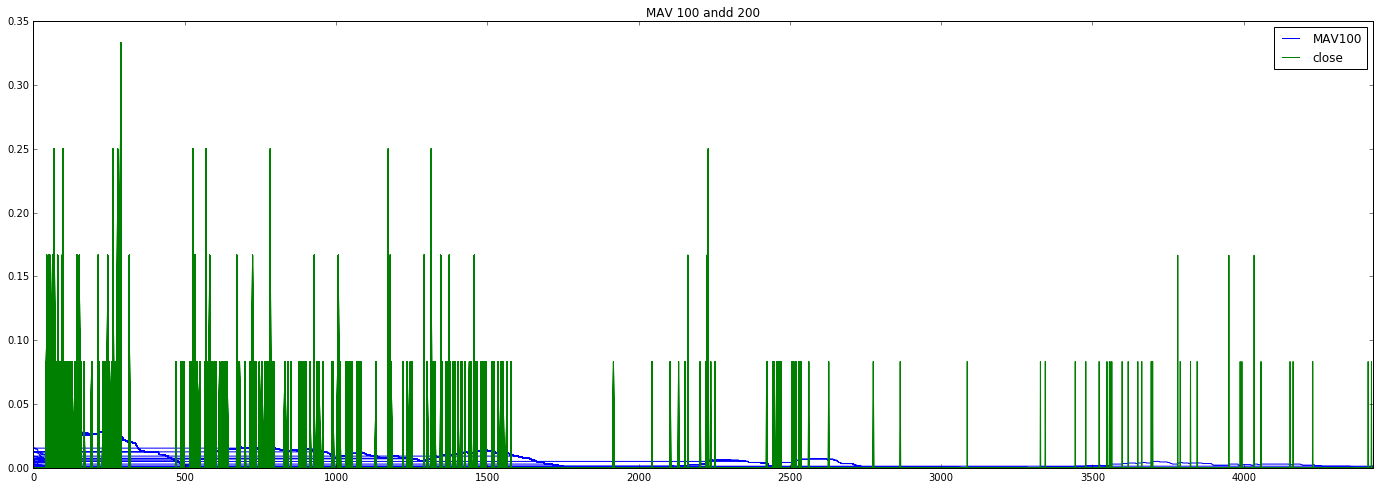

In [10]:
result = pd.DataFrame({'close': df['norm'], 'MAV100': df['MAV100']})
result.plot(title='MAV 100 andd 200')
plt.gcf().set_size_inches(24,8)

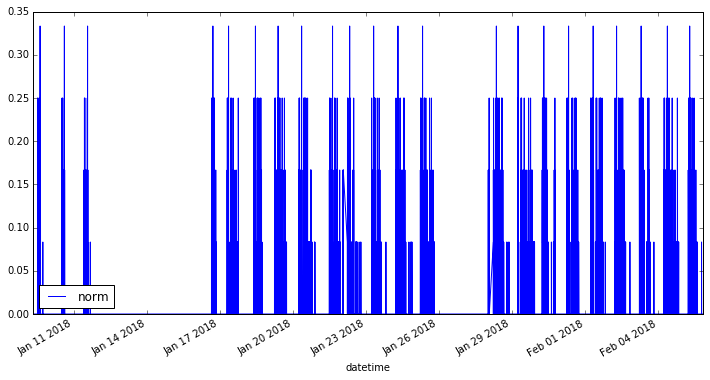

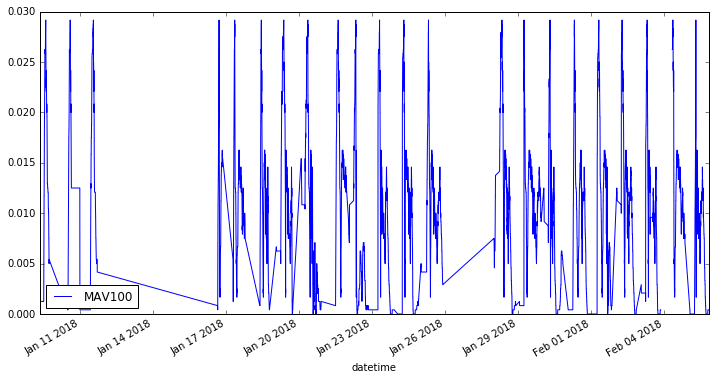

In [11]:
df.plot(x='datetime', y='norm',figsize=(12,6))
df.plot(x='datetime', y='MAV100',figsize=(12,6))

In [12]:
df.head()

,datetime,infractions,norm,MAV100
0,2018-02-04 01:36:04.936250,0,0.0,NaN
1,2018-02-04 01:37:00.188437,0,0.0,NaN
2,2018-02-04 01:38:00.103528,0,0.0,NaN
3,2018-02-04 01:39:00.129788,0,0.0,NaN
4,2018-02-04 01:40:00.025635,0,0.0,NaN


In [13]:
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [14]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

/home/stanlee321/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [49]:
df_n = df.fillna(0.0001)

In [50]:
raw = list(df_n['MAV100'].values)
y = np.array(raw)
series = pd.DataFrame(y, columns=['inf'])
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(series.values)
series = pd.DataFrame(scaled)

In [51]:
window_size = 50

series_s = series.copy()
for i in range(window_size):
    series = pd.concat([series, series_s.shift(-(i+1))], axis = 1)
    
series.dropna(axis=0, inplace=True)

In [52]:
series.head()

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
1,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
2,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
3,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429
4,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,...,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429,0.003429


In [53]:
series.shape

(39246, 51)

In [54]:
nrow = round(0.8*series.shape[0])

In [55]:
train = series.iloc[:nrow, :]
test = series.iloc[nrow:,:]


In [56]:
from sklearn.utils import shuffle
train = shuffle(train)
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [57]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [58]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(31397, 50)
(31397,)
(7849, 50)
(7849,)


In [59]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)


In [60]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(input_shape = (50,1), output_dim= 50, return_sequences = True))
model.add(Dropout(0.5))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="adam")
model.summary()

/home/stanlee321/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(50, 1), units=50, return_sequences=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 325,025
Trainable params: 325,025
Non-trainable params: 0
_________________________________________________________________


In [61]:
start = time.time()
model.fit(train_X,train_y,batch_size=512,epochs=3,validation_split=0.1)
print("> Compilation Time : ", time.time() - start)

Train on 28257 samples, validate on 3140 samples
Epoch 1/3
28257/28257 [==============================] - 143s 5ms/step - loss: 0.0114 - val_loss: 5.8576e-04
Epoch 2/3
28257/28257 [==============================] - 149s 5ms/step - loss: 0.0022 - val_loss: 5.3699e-04
Epoch 3/3
28257/28257 [==============================] - 172s 6ms/step - loss: 0.0020 - val_loss: 5.0507e-04
> Compilation Time :  465.57193303108215


In [66]:
test_X.shape

(7849, 50, 1)

In [62]:
# Doing a prediction on all the test data at once
preds = model.predict(test_X)

In [67]:
preds = scaler.inverse_transform(preds.reshape(-1,1))

In [68]:
actuals = scaler.inverse_transform(test_y.reshape(-1,1))
#actuals = test_y

In [69]:
mean_squared_error(actuals,preds)

3.9948150030945625e-07

In [70]:
#actuals = (actuals - np.mean(actuals)) / np.std(actuals)
plt.style.use('ggplot')

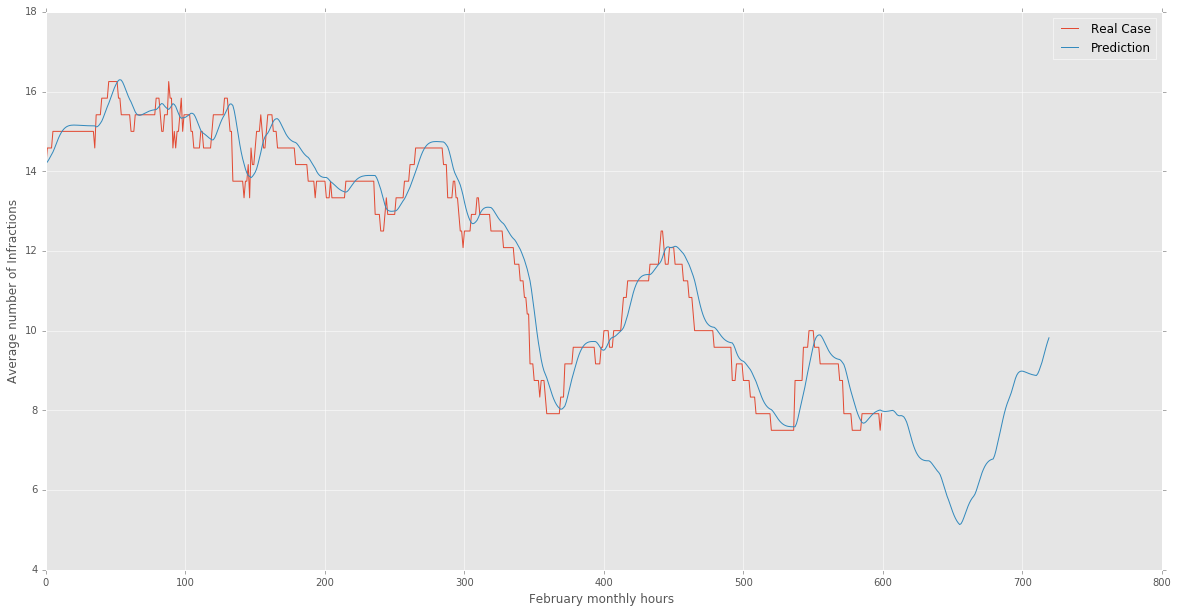

In [117]:

pyplot.figure(figsize=(20,10))
pyplot.xlabel('February monthly hours ')
pyplot.ylabel('Average number of Infractions')
pyplot.plot(actuals[0:600]*1000, label='Real Case')
pyplot.plot(preds[0:720]*1000, label='Prediction')
pyplot.legend()
pyplot.show()

(27,)
(27,)


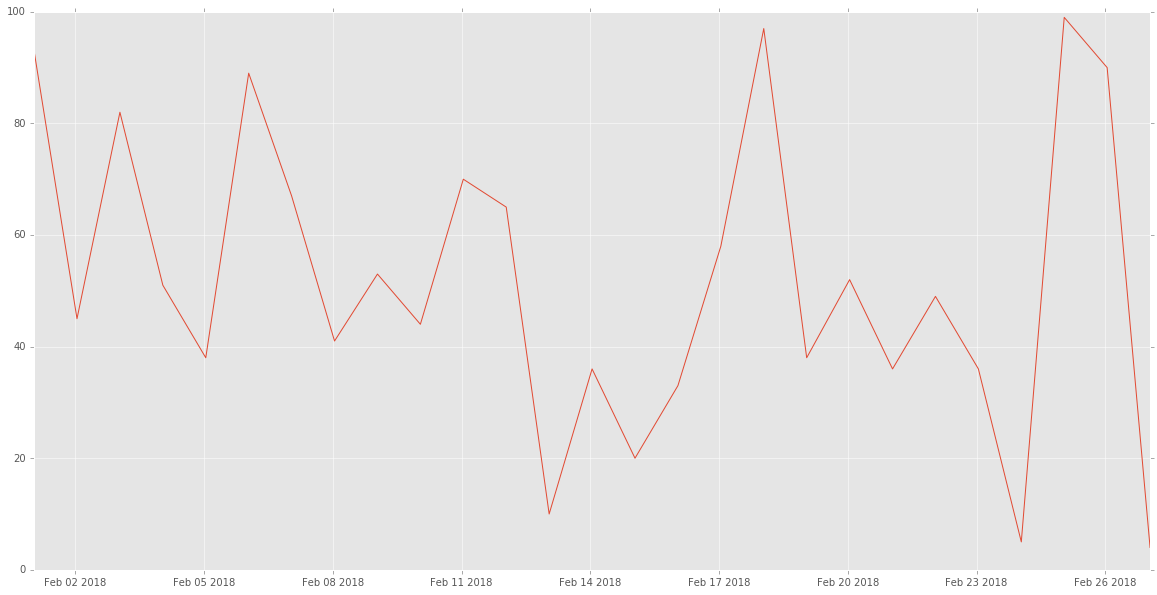

In [115]:
import datetime
x = np.array([datetime.datetime(2018, 2, i, 1, 0) for i in range(1,28)])
print(x.shape)
y = np.random.randint(100, size=x.shape)
#y = preds[0:720]*1000
print(y.shape)
plt.figure(figsize=(20,10))
plt.plot(x,y)
plt.show()

In [98]:
preds2 = model.predict(train_X)

In [99]:
preds2 = scaler.inverse_transform(preds2)

In [106]:
actuals2 = scaler.inverse_transform(train_y.reshape(-1,1))
mean_squared_error(actuals2,preds2)

2.9968498068493816e-05

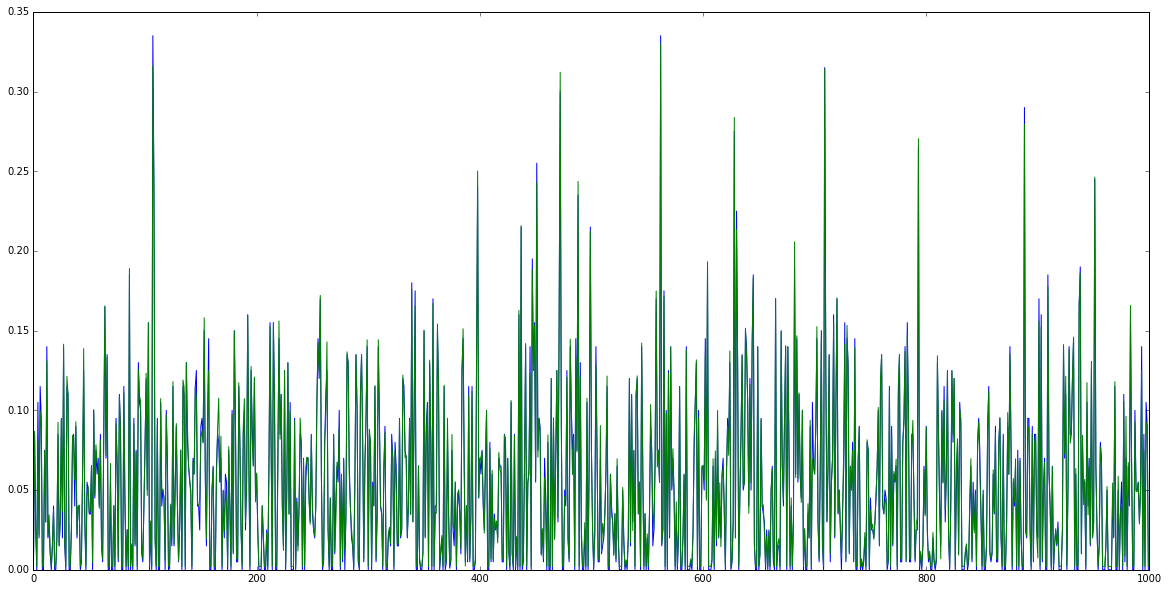

In [108]:
pyplot.figure(figsize=(20,10))
pyplot.plot(actuals2[29000:30000])
pyplot.plot(preds2[29000:30000])
pyplot.show()

In [ ]:
preds_moving = moving_test_window_preds(500)

In [110]:
import numpy as np
from numpy import convolve
import matplotlib.pyplot as plt
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
 
yMA = movingaverage(y,100)
print (yMA)

[0.18 0.18 0.18 ..., 0.060000000000000005 0.060000000000000005
 0.060000000000000005]


In [36]:
def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                    # Use this to store the prediction made on each test window
    moving_test_window = [test_X[0,:].tolist()]          # Creating the first test window
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:,:], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    preds_moving = scaler.inverse_transform(np.array(preds_moving)reshape(-1,1))
    
    return preds_moving
